In [52]:
# from selenium.webdriver import Chrome
# from bs4 import BeautifulSoup
import pymongo
# import datetime
# import time
import pandas as pd
import numpy as np
# import re
import warnings
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split
import string
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
mc = pymongo.MongoClient()
db = mc['chordify']
raw_html = db['raw_html']
parsed_songs_db = db["parsed_songs"]

In [3]:
# html_docs = list(raw_html.find())

In [4]:
cd ..

/Users/emilynaftalin/galvanize/dsi/capstone/Guitar-Chord-Generator


In [5]:
# from src.parse import *

In [6]:
from src import logistic_model

In [96]:
%run src/logistic_model.py

In [97]:
df_logi_song

,contains_minor,lyrics
0,True,As I went out one morning to breathe the air a...
1,True,As I went out one morning to breathe the air a...
2,True,As I went out one morning to breathe the air a...
3,True,As I went out one morning to breathe the air a...
4,True,One by one they followed the sun One by one un...
5,False,I went to the doctor he says I'm alright I kne...
6,False,When she said Don't waste your words they're j...
7,False,Take a trip with me in 1913 To Calumet Michiga...
8,True,One by one they followed the sun One by one un...
9,False,I went to the doctor he says I'm alright I kne...


In [89]:
log_score

0.77777777777777779

In [13]:
log_test_df = lyrics_test.to_frame()

In [14]:
contains_minor_pred

array([ True, False,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True, False,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True, False,  True,  True,  True,
       False,  True,  True,  True, False,  True,  True,  True,  True], dtype=bool)

In [15]:
log_test_df['contains_minor_test'] = contains_minor_test

In [38]:
log_test_df['contains_minor_pred'] = contains_minor_pred
log_test_df.head()

,lyrics,contains_minor_test,contains_minor_pred
119,Well there was this movie I seen one time Abou...,False,True
44,I ain't looking to compete with you Beat or ch...,False,False
199,Oh help me in my weakness I heard the drifter ...,False,True
187,Well it ain't no use to sit and wonder why bab...,True,True
66,You walk into the room With your pencil in you...,True,True


In [39]:
y_hat_log[:8]

array([[ 0.21852613,  0.78147387],
       [ 0.53849554,  0.46150446],
       [ 0.35507314,  0.64492686],
       [ 0.2421779 ,  0.7578221 ],
       [ 0.22123225,  0.77876775],
       [ 0.26047833,  0.73952167],
       [ 0.70681986,  0.29318014],
       [ 0.24416174,  0.75583826]])

In [98]:
parsed_songs_db.find().count()

266

In [40]:
parsed_songs = list(parsed_songs_db.find())
len(parsed_songs)

216

In [41]:
sd = make_song_dicts(parsed_songs)

In [42]:
%pdb off

Automatic pdb calling has been turned OFF


In [43]:
raw_html.find().count()

5506

In [45]:
lyrics_train[:8]

71     One evenin' for pleasure I rambled to view The...
175    Fat man lookin' in a blade of steel thin man l...
202    Aadd4 X0000020200 Listen to that Duquesne whis...
119    Well there was this movie I seen one time Abou...
96     How many roads must a man walk down before you...
140    and it goes like this E 0 0 0 Far between sund...
171    They're selling postcards of the hanging They'...
3      As I went out one morning to breathe the air a...
Name: lyrics, dtype: object

In [46]:
%run src/multinomial_model.py

In [47]:
nb_score

0.61111111111111116

In [48]:
%run src/random_forest_model.py

In [49]:
rf_score

0.72222222222222221

#### Drawing ROC curves 

In [73]:
# def decision_boundary_x2(x, b0, b1, b2, threshold):
#     return (np.log((1 - threshold)/threshold) - b0 - x*b1 )/b2

# def plot_decision_boundary(X, y, model, ax=None):
#     '''plot 2-d array of points, with decision boundaries'''
#     if ax is None:
#         fig, ax = plt.subplots(figsize=(10,10))
#     ax.scatter(X[:,0], X[:,1], color=np.where(y, 'g', 'b'), alpha=0.5, s=3)
#     ax.plot(*X[y==0].mean(axis=0).reshape(-1,1), color='b', marker='+', mew=4, ms=20)
#     ax.plot(*X[y==1].mean(axis=0).reshape(-1,1), color='g', marker='+', mew=4, ms=20)
#     ax.axis('equal')

#     xmin, xmax = X[:,0].min(), X[:,0].max()
#     xrng = np.array([2*xmin-xmax, 2*xmax-xmin])

#     ylim = ax.get_ylim()
#     xlim = ax.get_xlim()

#     beta0 = model.intercept_
#     beta1, beta2 = model.coef_[0]
#     print (beta0, beta1, beta2)
    
#     for threshold, ls in zip(1/(1+np.exp(-np.arange(-3,4))), [':', '-.', '--', '-', '--', '-.', ':']):
#         ax.plot(xrng,
#                 decision_boundary_x2(xrng, beta0, beta1, beta2, threshold),
#                 color='r',
#                 ls=ls,
#                 label="{:.2f}%".format(threshold*100))
#     ax.legend(title='threshold')
#     ax.set_xlim(xlim)
#     ax.set_ylim(ylim)

In [74]:
def calculate_threshold_values(prob, y):
    '''
    Build dataframe of the various confusion-matrix ratios by threshold
    from a list of predicted probabilities and actual y values
    '''
    df = pd.DataFrame({'prob': prob, 'y': y})
    df.sort_values('prob', inplace=True)
    
    actual_p = df.y.sum()
    actual_n = df.shape[0] - df.y.sum()

    df['tn'] = (df.y == 0).cumsum()
    df['fn'] = df.y.cumsum()
    df['fp'] = actual_n - df.tn
    df['tp'] = actual_p - df.fn

    df['fpr'] = df.fp/(df.fp + df.tn)
    df['tpr'] = df.tp/(df.tp + df.fn)
    df['precision'] = df.tp/(df.tp + df.fp)
    df = df.reset_index(drop=True)
    return df
    
def plot_roc(ax, df):
    ax.plot([1]+list(df.fpr), [1]+list(df.tpr), label="ROC")
    ax.plot([0,1],[0,1], 'k', label="random")
    ax.set_xlabel('fpr')
    ax.set_ylabel('tpr')
    ax.set_title('ROC Curve')
    ax.legend()
    
def plot_precision_recall(ax, df):
    ax.plot(df.tpr,df.precision, label='precision/recall')
    #ax.plot([0,1],[0,1], 'k')
    ax.set_xlabel('recall')
    ax.set_ylabel('precision')
    ax.set_title('Precision/Recall Curve')
    ax.plot([0,1],[df.precision[0],df.precision[0]], 'k', label='random')
    ax.set_xlim(xmin=0,xmax=1)
    ax.set_ylim(ymin=0,ymax=1)

In [75]:
# X = train_matrix
# y = contains_minor_train

In [76]:
# logistic = LogisticRegression(C=1000)
# logistic.fit(X, y)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

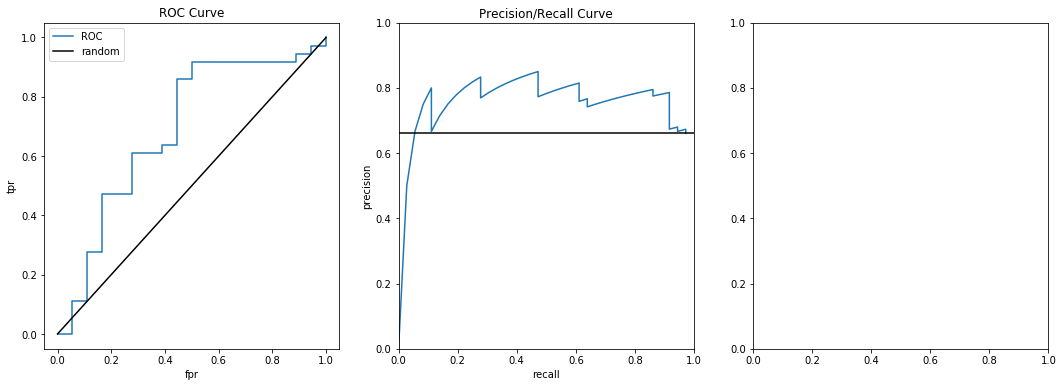

In [90]:
fig, (ax0, ax1, ax3) = plt.subplots(1,3, figsize=(18,6))
df = calculate_threshold_values(contains_minor_pred, contains_minor_test)
plot_roc(ax0, df)
plot_precision_recall(ax1, df)
# plot_decision_boundary(X, y, logistic, ax3)

In [92]:
test_matrix.shape

(54, 3579)

In [93]:
logistic.predict_proba("some words i don't trust nobody trust me")

ValueError: X has 1 features per sample; expecting 3579